In [1]:
import random
import numpy
from matplotlib import pyplot as plt
from torch_geometric.utils import *
from datasets import WebKB, WikipediaNetwork, FilmNetwork, BGP, Airports
from gnnutils import *
from build_multigraph import build_pyg_struc_multigraph
import seaborn as sns
from torch_geometric.datasets import Planetoid

In [2]:
def get_assortativity(data, use_weights=False):
    bg = to_networkx(data)
    print(bg.number_of_edges())
    if use_weights:
        r_g = global_assortativity(bg, data.y.numpy(), data.edge_weight.numpy())
    else:
        r_g = global_assortativity(bg, data.y.numpy())

    print("Global Assortativity: ",r_g)
    if use_weights:
        _, r_l , _ = local_assortativity(bg,data.y.numpy(), data.edge_weight.numpy())
    else:
        _, r_l , _ = local_assortativity(bg,data.y.numpy())
        
    return r_g, r_l


In [3]:
def get_data(d, bgp=False, airports=False):
    if airports:
        dataset = Airports(root="original_datasets/airports_dataset/"+d, dataset_name=d)
        original = dataset[0]
    elif bgp:
        dataset = BGP(root="original_datasets/bgp_dataset")
        original = dataset[0]
    else:
        if d in ["cornell", "texas", "wisconsin"]:
            dataset = WebKB(root="original_datasets/webkb", name=d)
        elif d in ["chameleon", "squirrel"]:
            dataset = WikipediaNetwork(root="original_datasets/wiki", name=d)
        else:
            dataset = FilmNetwork(root="original_datasets/film", name=d)
        original = dataset[0]
    print(original)
    return original

In [4]:
def get_plot(dataset, b, bgp=False, airports=False):
    data = get_data(dataset, bgp, airports)
    r_g, r_l = get_assortativity(data)
    return r_g, r_l

In [5]:
b = 20

In [6]:
r_g_c, r_l_c = get_plot("chameleon", b)


Data(edge_index=[2, 62792], test_mask=[2277, 10], train_mask=[2277, 10], val_mask=[2277, 10], x=[2277, 2325], y=[2277])


  1%|          | 14/2277 [00:00<00:16, 136.79it/s]

62792
Global Assortativity:  (0.03316148311146054, array([[0.0281883 , 0.06669639, 0.01989107, 0.02083068, 0.02379284],
       [0.06669639, 0.03373041, 0.02723277, 0.02411135, 0.02970124],
       [0.01989107, 0.02723277, 0.0467894 , 0.04895528, 0.05440183],
       [0.02083068, 0.02411135, 0.04895528, 0.05707733, 0.06911708],
       [0.02379284, 0.02970124, 0.05440183, 0.06911708, 0.06475347]]))
start iteration


100%|██████████| 2277/2277 [00:20<00:00, 108.51it/s]


In [7]:
r_g_s, r_l_s = get_plot("squirrel", b)

Data(edge_index=[2, 396846], test_mask=[5201, 10], train_mask=[5201, 10], val_mask=[5201, 10], x=[5201, 2089], y=[5201])
396846
Global Assortativity:  (0.007055677800582819, array([[0.01913589, 0.02164064, 0.02086452, 0.02391356, 0.03628108],
       [0.02164064, 0.02700796, 0.03000912, 0.03523533, 0.04828321],
       [0.02086452, 0.03000912, 0.03910081, 0.04668058, 0.05705992],
       [0.02391356, 0.03523533, 0.04668058, 0.056246  , 0.06882771],
       [0.03628108, 0.04828321, 0.05705992, 0.06882771, 0.08091804]]))


  0%|          | 5/5201 [00:00<01:48, 47.73it/s]

start iteration


100%|██████████| 5201/5201 [01:55<00:00, 44.94it/s]


In [8]:
r_g_f, r_l_f = get_plot("film", b)

Data(edge_index=[2, 53411], test_mask=[7600, 10], train_mask=[7600, 10], val_mask=[7600, 10], x=[7600, 932], y=[7600])


  0%|          | 0/7600 [00:00<?, ?it/s]

53411
Global Assortativity:  (0.004735655799170577, array([[0.01215106, 0.01789893, 0.02222389, 0.02611822, 0.02696074],
       [0.01789893, 0.03010616, 0.03710846, 0.04371759, 0.0443916 ],
       [0.02222389, 0.03710846, 0.0461141 , 0.0555878 , 0.05322874],
       [0.02611822, 0.04371759, 0.0555878 , 0.06605381, 0.06309562],
       [0.02696074, 0.0443916 , 0.05322874, 0.06309562, 0.06491172]]))
start iteration


100%|██████████| 7600/7600 [01:26<00:00, 88.20it/s] 


In [9]:
r_g_co, r_l_co = get_plot("cornell", b)

 19%|█▉        | 35/183 [00:00<00:00, 349.29it/s]

Data(edge_index=[2, 557], test_mask=[183, 10], train_mask=[183, 10], val_mask=[183, 10], x=[183, 1703], y=[183])
557
Global Assortativity:  (-0.07069980185917214, array([[0.07540395, 0.00179533, 0.02154399, 0.18312388, 0.03949731],
       [0.00179533, 0.        , 0.        , 0.00897666, 0.00359066],
       [0.02154399, 0.        , 0.01077199, 0.02872531, 0.01077199],
       [0.18312388, 0.00897666, 0.02872531, 0.19928187, 0.05206463],
       [0.03949731, 0.00359066, 0.01077199, 0.05206463, 0.01436266]]))
start iteration


100%|██████████| 183/183 [00:00<00:00, 345.99it/s]


In [10]:
r_g_t, r_l_t = get_plot("texas", b)

 22%|██▏       | 40/183 [00:00<00:00, 392.97it/s]

Data(edge_index=[2, 574], test_mask=[183, 10], train_mask=[183, 10], val_mask=[183, 10], x=[183, 1703], y=[183])
574
Global Assortativity:  (-0.25871925140403595, array([[0.0087108 , 0.        , 0.02090592, 0.17595819, 0.08710801],
       [0.        , 0.        , 0.00348432, 0.        , 0.        ],
       [0.02090592, 0.00348432, 0.01393728, 0.08710801, 0.03832753],
       [0.17595819, 0.        , 0.08710801, 0.05400697, 0.04355401],
       [0.08710801, 0.        , 0.03832753, 0.04355401, 0.01045296]]))
start iteration


100%|██████████| 183/183 [00:00<00:00, 390.36it/s]


In [11]:
r_g_w, r_l_w = get_plot("wisconsin", b)

 15%|█▌        | 38/251 [00:00<00:00, 371.87it/s]

Data(edge_index=[2, 916], test_mask=[251, 10], train_mask=[251, 10], val_mask=[251, 10], x=[251, 1703], y=[251])
916
Global Assortativity:  (-0.15240889910471722, array([[0.00218341, 0.00655022, 0.        , 0.00545852, 0.01200873],
       [0.00655022, 0.11899563, 0.20742358, 0.05567686, 0.00982533],
       [0.        , 0.20742358, 0.0360262 , 0.04694323, 0.03930131],
       [0.00545852, 0.05567686, 0.04694323, 0.01200873, 0.02074236],
       [0.01200873, 0.00982533, 0.03930131, 0.02074236, 0.02292576]]))
start iteration


100%|██████████| 251/251 [00:00<00:00, 369.13it/s]


In [12]:
r_g_bgp, r_l_bgp = get_plot("bgp", b,bgp=True)

Data(edge_index=[2, 206799], test_mask=[10176], train_mask=[10176], val_mask=[10176], x=[10176, 287], y=[10176])
206799
Global Assortativity:  (1.1077076611523441e-05, array([[3.25920338e-03, 1.46615796e-02, 3.66539490e-03, 1.72147834e-03,
        2.62428735e-02, 9.15381602e-03, 2.70794346e-04],
       [1.46954289e-02, 6.65960667e-02, 1.69778384e-02, 7.79500868e-03,
        1.25996741e-01, 4.31288352e-02, 1.32495805e-03],
       [3.59286070e-03, 1.62428252e-02, 4.11027133e-03, 1.91006726e-03,
        3.10591444e-02, 1.06576918e-02, 3.28821706e-04],
       [1.84236868e-03, 8.22054265e-03, 2.28724510e-03, 1.05416370e-03,
        1.64120716e-02, 5.60931146e-03, 1.69246466e-04],
       [2.09623838e-02, 9.84966078e-02, 2.51113400e-02, 1.17650472e-02,
        1.85407086e-01, 6.46231365e-02, 1.98743708e-03],
       [7.06966668e-03, 3.41539369e-02, 8.57837804e-03, 3.94102486e-03,
        6.43233284e-02, 2.24565883e-02, 6.43136572e-04],
       [5.12575012e-04, 2.74179276e-03, 7.01163932e-04, 2.

/u/ml00_s/suresh43/gnns-and-local-assortativity/gnnutils.py:244: RuntimeWarning: divide by zero encountered in true_divide
  D = sparse.diags(1. / degree, 0, format='csc')
/u/ml00_s/suresh43/gnns-and-local-assortativity/gnnutils.py:254: RuntimeWarning: invalid value encountered in true_divide
  Z = W.dot(Z) / degree
  0%|          | 0/10176 [00:00<?, ?it/s]/u/ml00_s/suresh43/gnns-and-local-assortativity/gnnutils.py:197: RuntimeWarning: divide by zero encountered in true_divide
  D = sparse.diags(1./degree, 0, format='csc')
/u/ml00_s/suresh43/gnns-and-local-assortativity/gnnutils.py:289: RuntimeWarning: invalid value encountered in true_divide
  e_gh /= np.sum(e_gh)
  0%|          | 5/10176 [00:00<03:31, 48.09it/s]

start iteration


100%|██████████| 10176/10176 [01:32<00:00, 109.75it/s]


In [13]:
r_g_br, r_l_br = get_plot("brazil", b,airports=True)
r_g_eu, r_l_eu = get_plot("europe", b,airports=True)
r_g_us, r_l_us = get_plot("usa", b, airports=True)


 45%|████▌     | 59/131 [00:00<00:00, 584.44it/s]

Data(edge_index=[2, 2077], x=[131, 1], y=[131])
2077
Global Assortativity:  (0.011646396242485039, array([[0.37024555, 0.14780934, 0.05488686, 0.04140587],
       [0.14780934, 0.05681271, 0.01974001, 0.00770342],
       [0.05488686, 0.01974001, 0.01636976, 0.00337025],
       [0.04140587, 0.00770342, 0.00337025, 0.00674049]]))
start iteration


  0%|          | 0/399 [00:00<?, ?it/s]

Data(edge_index=[2, 11988], x=[399, 1], y=[399])
11988
Global Assortativity:  (-0.07370492070926721, array([[0.34517851, 0.16132799, 0.06706707, 0.04045712],
       [0.16132799, 0.05188522, 0.01659993, 0.00909243],
       [0.06706707, 0.01659993, 0.00517184, 0.00308642],
       [0.04045712, 0.00909243, 0.00308642, 0.0025025 ]]))
start iteration


  0%|          | 0/1190 [00:00<?, ?it/s]

Data(edge_index=[2, 27198], x=[1190, 1], y=[1190])
27198
Global Assortativity:  (0.26294514114798095, array([[0.62210457, 0.07283624, 0.03735569, 0.01694978],
       [0.07283624, 0.05603353, 0.01683947, 0.00441209],
       [0.03735569, 0.01683947, 0.0166924 , 0.00268402],
       [0.01694978, 0.00441209, 0.00268402, 0.00301493]]))
start iteration


100%|██████████| 1190/1190 [00:05<00:00, 213.04it/s]


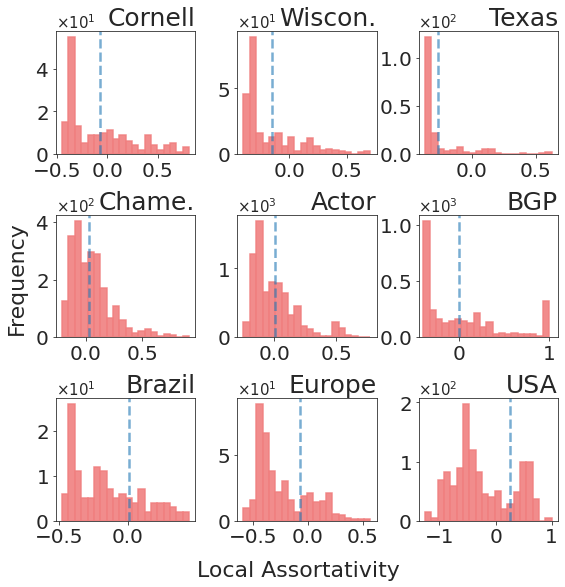

In [14]:
sns.set_style("ticks")

# Some example data to display

fig, axs = plt.subplots(3, 3, gridspec_kw = {'wspace':.3, 'hspace':.5})
    
b = 20
ax = axs[1,0]
ax.hist(r_l_c, bins=b,alpha=0.9, color='lightcoral',edgecolor='lightcoral', linewidth=1.5, label='local')
ax.axvline(x=r_g_c[0], linestyle='--', alpha=0.6, linewidth=2.5, label='global')
ax.set_title('Chame.',fontsize=25, loc="right")


# ax.legend(loc='upper right', fontsize=20)

b = 20
ax = axs[1,1]
ax.hist(r_l_f, bins=b,alpha=0.9, color='lightcoral',edgecolor='lightcoral', linewidth=1.5)
ax.axvline(x=r_g_f[0], linestyle='--', alpha=0.6, linewidth=2.5)
ax.set_title('Actor',fontsize=25, loc="right")


b = 20
ax = axs[0,0]
ax.hist(r_l_co, bins=b,alpha=0.9, color='lightcoral',edgecolor='lightcoral', linewidth=1.5)
ax.axvline(x=r_g_co[0], linestyle='--', alpha=0.6, linewidth=2.5)
ax.set_title('Cornell',fontsize=25, loc="right")
# ax.set_xlim(-0.75, 0.8)



b = 20
ax = axs[0,1]
ax.hist(r_l_w, bins=b,alpha=0.9, color='lightcoral',edgecolor='lightcoral', linewidth=1.5)
ax.axvline(x=r_g_w[0], linestyle='--', alpha=0.6, linewidth=2.5)
ax.set_title('Wiscon.',fontsize=25, loc="right")


b = 20
ax = axs[0,2]
ax.hist(r_l_t, bins=b,alpha=0.9, color='lightcoral',edgecolor='lightcoral', linewidth=1.5)
ax.axvline(x=r_g_t[0], linestyle='--', alpha=0.6, linewidth=2.5)
ax.set_title('Texas',fontsize=25, loc="right")


b = 20
ax = axs[1,2]
ax.hist(r_l_bgp, bins=b,alpha=0.9, color='lightcoral',edgecolor='lightcoral', linewidth=1.5)
ax.axvline(x=r_g_bgp[0], linestyle='--', alpha=0.6, linewidth=2.5)
ax.set_title('BGP',fontsize=25, loc="right")
ax.set_xlim(-.45, 1.1)


b = 20
ax = axs[2,0]
ax.hist(r_l_br, bins=b,alpha=0.9, color='lightcoral',edgecolor='lightcoral', linewidth=1.5)
ax.axvline(x=r_g_br[0], linestyle='--', alpha=0.6, linewidth=2.5)
ax.set_title('Brazil',fontsize=25, loc="right")


b = 20
ax = axs[2,2]
ax.hist(r_l_us, bins=b,alpha=0.9, color='lightcoral',edgecolor='lightcoral', linewidth=1.5)
ax.axvline(x=r_g_us[0], linestyle='--', alpha=0.6, linewidth=2.5)
ax.set_title('USA',fontsize=25, loc="right")


b=20
ax = axs[2,1]
ax.hist(r_l_eu, bins=b,alpha=0.9, color='lightcoral',edgecolor='lightcoral', linewidth=1.5)
ax.axvline(x=r_g_eu[0], linestyle='--', alpha=0.6, linewidth=2.5)
ax.set_title('Europe',fontsize=25, loc="right")


for ax in axs.flat:
    
#     ax.set_xlim(-.5, 1.0)
    ax.tick_params(axis='x',rotation=0, labelsize=20)
    ax.tick_params(axis='y',rotation=0, labelsize=20)
    ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.get_offset_text().set_fontsize(15)


#Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()



fig.set_figheight(9)

fig.set_figwidth(9)
# fig.tight_layout()

fig.text(0.5, 0.04, 'Local Assortativity', ha='center', fontsize=22)
fig.text(0.05, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=22)

fig.savefig('figures/local_assortativity_dataset.png', dpi=200, format='png', bbox_inches = 'tight')